# DS-NYC-45 | Final Project 4: Modeling Performance

In [65]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn as skl
from sklearn import ensemble, neighbors, tree, metrics

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

In [66]:
users = pd.read_csv(os.path.join('project_dataset', 'user_data.csv'), index_col='user_id')
res = pd.read_csv(os.path.join('project_dataset', 'reservations_data.csv'), index_col='user_id')


In [67]:
df = pd.concat([users, res], axis=1, join_axes=[users.index])

df.head()

,is_converted,lead_created_month,lead_created_day_of_week,is_paidsocial_lead,is_organic_lead,lead_msa_id,is_seo_studios,is_inviteafriend,is_email,is_referral,is_paidsocial,marketing_channel,is_organic,user_acquisition_month,user_acquisition_day_of_week,promo_days,lead_to_promo_days,is_three_studio_visits,is_two_studio_visits,is_four_studio_visits,acquisition_plan_category,zip,is_onboarded,user_country,user_msa_id,promo_alias,parent_promo,promo_category,is_commitment_plan,avg_class_rating,avg_days_from_booking_to_class,avg_peak_classes,reservations_attended_barre_count,reservations_attended_boxing_count,reservations_attended_cycling_count,reservations_attended_dance_count,reservations_attended_gym_count,reservations_attended_martial_arts_count,reservations_attended_pilates_count,reservations_attended_rowing_count,reservations_attended_strength_training_count,reservations_attended_yoga_count,reservations_attended_t1_count,reservations_attended_t2_count,reservations_attended_t3_count,reservations_attended_count,reservations_missed_count,reservations_late_cancelled_count,cost_of_all_reservations_in_usd_no_tax
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12,0,5,4,0,1,1.0,0,0,0,0,0,Sell Page,1,9.0,3.0,NaN,0,1,0,0,CP Complimentary,10001,1,1.0,1.0,no_promo,no_promo,no_promo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,0,5,5,0,1,1.0,0,0,0,0,0,Sell Page,1,9.0,3.0,NaN,0,1,0,0,CP Complimentary,10009,1,1.0,1.0,no_promo,no_promo,no_promo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1,6,1,0,1,1.0,0,0,0,0,0,Mobile,1,9.0,1.0,NaN,0,0,1,0,CP Base,10003,1,1.0,1.0,no_promo,no_promo,no_promo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,1,7,3,0,1,1.0,0,0,0,0,0,Sell Page,1,8.0,4.0,NaN,0,1,0,0,CP Unlimited,NaN,1,1.0,1.0,no_promo,no_promo,no_promo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,1,6,1,0,1,1.0,0,0,0,0,0,Sell Page,0,8.0,3.0,30.0,429,0,1,0,CP Base,30363,1,1.0,1.0,aug1fb,dollarpromo,trial,0.0,5.0,1.25,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,25.0


In [68]:
df = df.fillna(0)
df.head()

,is_converted,lead_created_month,lead_created_day_of_week,is_paidsocial_lead,is_organic_lead,lead_msa_id,is_seo_studios,is_inviteafriend,is_email,is_referral,is_paidsocial,marketing_channel,is_organic,user_acquisition_month,user_acquisition_day_of_week,promo_days,lead_to_promo_days,is_three_studio_visits,is_two_studio_visits,is_four_studio_visits,acquisition_plan_category,zip,is_onboarded,user_country,user_msa_id,promo_alias,parent_promo,promo_category,is_commitment_plan,avg_class_rating,avg_days_from_booking_to_class,avg_peak_classes,reservations_attended_barre_count,reservations_attended_boxing_count,reservations_attended_cycling_count,reservations_attended_dance_count,reservations_attended_gym_count,reservations_attended_martial_arts_count,reservations_attended_pilates_count,reservations_attended_rowing_count,reservations_attended_strength_training_count,reservations_attended_yoga_count,reservations_attended_t1_count,reservations_attended_t2_count,reservations_attended_t3_count,reservations_attended_count,reservations_missed_count,reservations_late_cancelled_count,cost_of_all_reservations_in_usd_no_tax
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12,0,5,4,0,1,1.0,0,0,0,0,0,Sell Page,1,9.0,3.0,0.0,0,1,0,0,CP Complimentary,10001,1,1.0,1.0,no_promo,no_promo,no_promo,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0,5,5,0,1,1.0,0,0,0,0,0,Sell Page,1,9.0,3.0,0.0,0,1,0,0,CP Complimentary,10009,1,1.0,1.0,no_promo,no_promo,no_promo,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,1,6,1,0,1,1.0,0,0,0,0,0,Mobile,1,9.0,1.0,0.0,0,0,1,0,CP Base,10003,1,1.0,1.0,no_promo,no_promo,no_promo,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,1,7,3,0,1,1.0,0,0,0,0,0,Sell Page,1,8.0,4.0,0.0,0,1,0,0,CP Unlimited,0,1,1.0,1.0,no_promo,no_promo,no_promo,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,1,6,1,0,1,1.0,0,0,0,0,0,Sell Page,0,8.0,3.0,30.0,429,0,1,0,CP Base,30363,1,1.0,1.0,aug1fb,dollarpromo,trial,0.0,5.0,1.25,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,25.0


In [69]:
df = pd.get_dummies(data=df, columns=['marketing_channel', 'acquisition_plan_category','promo_alias','parent_promo','promo_category'], drop_first=True)

df.head()

,is_converted,lead_created_month,lead_created_day_of_week,is_paidsocial_lead,is_organic_lead,lead_msa_id,is_seo_studios,is_inviteafriend,is_email,is_referral,is_paidsocial,is_organic,user_acquisition_month,user_acquisition_day_of_week,promo_days,lead_to_promo_days,is_three_studio_visits,is_two_studio_visits,is_four_studio_visits,zip,is_onboarded,user_country,user_msa_id,is_commitment_plan,avg_class_rating,avg_days_from_booking_to_class,avg_peak_classes,reservations_attended_barre_count,reservations_attended_boxing_count,reservations_attended_cycling_count,reservations_attended_dance_count,reservations_attended_gym_count,reservations_attended_martial_arts_count,reservations_attended_pilates_count,reservations_attended_rowing_count,reservations_attended_strength_training_count,reservations_attended_yoga_count,reservations_attended_t1_count,reservations_attended_t2_count,reservations_attended_t3_count,reservations_attended_count,reservations_missed_count,reservations_late_cancelled_count,cost_of_all_reservations_in_usd_no_tax,marketing_channel_Display,marketing_channel_Email,marketing_channel_IAF,marketing_channel_Mobile,marketing_channel_Other Paid,marketing_channel_Other Unpaid,...,parent_promo_lionsgate,parent_promo_lithium-technologies,parent_promo_looker,parent_promo_media-arts-lab,parent_promo_memexclrate,parent_promo_mindfulchef,parent_promo_nike,parent_promo_no_promo,parent_promo_nordstrom,parent_promo_nov50off,parent_promo_oct70off,parent_promo_palantir-technologies,parent_promo_pandora,parent_promo_pinterest,parent_promo_popsugar,parent_promo_price,parent_promo_snapchat,parent_promo_square,parent_promo_startermonth,parent_promo_starterplan,parent_promo_sthree,parent_promo_tbwa-chiat-day,parent_promo_tesla,parent_promo_thirtyoff,parent_promo_thumbtack,parent_promo_triage-consulting-group,parent_promo_trial,parent_promo_tripadvisor,parent_promo_twentyoff,parent_promo_twitter,parent_promo_uber,parent_promo_unlimitedcp,parent_promo_unlimitedhp,parent_promo_unlimitedla,parent_promo_virgin-america,parent_promo_waggener-edstrom,parent_promo_weber-shandwick,parent_promo_welcomefitmob,parent_promo_wellness-oasis,parent_promo_wework,parent_promo_wharton4for49,parent_promo_william-morris-endeavor,promo_category_commitment_plan,promo_category_corporate_trial,promo_category_no_promo,promo_category_other,promo_category_promo,promo_category_social_referral,promo_category_starter_month,promo_category_trial
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12,0,5,4,0,1,1.0,0,0,0,0,0,1,9.0,3.0,0.0,0,1,0,0,10001,1,1.0,1.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14,0,5,5,0,1,1.0,0,0,0,0,0,1,9.0,3.0,0.0,0,1,0,0,10009,1,1.0,1.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15,1,6,1,0,1,1.0,0,0,0,0,0,1,9.0,1.0,0.0,0,0,1,0,10003,1,1.0,1.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16,1,7,3,0,1,1.0,0,0,0,0,0,1,8.0,4.0,0.0,0,1,0,0,0,1,1.0,1.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [77]:
df.dtypes

is_converted                                         int64
lead_created_month                                   int64
lead_created_day_of_week                             int64
is_paidsocial_lead                                   int64
is_organic_lead                                      int64
lead_msa_id                                        float64
is_seo_studios                                       int64
is_inviteafriend                                     int64
is_email                                             int64
is_referral                                          int64
is_paidsocial                                        int64
is_organic                                           int64
user_acquisition_month                             float64
user_acquisition_day_of_week                       float64
promo_days                                         float64
lead_to_promo_days                                   int64
is_three_studio_visits                               int

In [78]:
df = df.drop('zip', axis=1)

In [79]:
X = df.drop('is_converted', axis=1)
y = df['is_converted'].astype(int)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [81]:
def format_model_results(sklearn_model, X_train, X_test, y_train, y_test):
    # Get the model's class name (E.g. LogisticRegression, KNearestNeighbor, etc.) and store it to a string
    model_class_name = sklearn_model.__class__.__name__  
    
    y_test_pred   = sklearn_model.predict(X_test)
    y_test_pred_proba   = sklearn_model.predict_proba(X_test)
    y_train_pred  = sklearn_model.predict(X_train)

    accuracy_score  = metrics.accuracy_score(y_test, y_test_pred)
    precision_score = metrics.precision_score(y_test, y_test_pred, average='binary')
    recall_score    = metrics.recall_score(y_test, y_test_pred, average='binary')
    f1_score        = metrics.f1_score(y_test, y_test_pred, average='binary')
    f1_score_train  = metrics.f1_score(y_train, y_train_pred, average='binary')
    
    return pd.DataFrame({
            "Accuracy": accuracy_score, 
            "Precision": precision_score, 
            "Recall": recall_score, 
            "F1 score": f1_score, 
            "F1 score (train)": f1_score_train
        }, index=[model_class_name])

In [85]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 30)
    
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [86]:
format_model_results(rfc, X_train, X_test, y_train, y_test)

,Accuracy,F1 score,F1 score (train),Precision,Recall
RandomForestClassifier,0.795014,0.842797,0.997752,0.842098,0.843498


In [87]:
features = X.columns
feature_importances = rfc.feature_importances_

features_rfc = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_rfc.sort_values('Importance Score', inplace=True, ascending=False)

print features_rfc

                                            Features  Importance Score
13                                        promo_days      6.989743e-02
41            cost_of_all_reservations_in_usd_no_tax      5.446870e-02
11                            user_acquisition_month      5.090199e-02
38                       reservations_attended_count      4.291390e-02
24                                  avg_peak_classes      4.203030e-02
23                    avg_days_from_booking_to_class      3.768562e-02
0                                 lead_created_month      3.541161e-02
22                                  avg_class_rating      3.301746e-02
258                             promo_alias_no_promo      3.114682e-02
20                                       user_msa_id      3.034370e-02
4                                        lead_msa_id      2.904960e-02
12                      user_acquisition_day_of_week      2.747726e-02
14                                lead_to_promo_days      2.726086e-02
1     

In [88]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
etc = ExtraTreesClassifier()
etc.fit(X, y)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

                                                 importance
feature                                                    
promo_category_no_promo                               0.047
avg_class_rating                                      0.042
user_acquisition_month                                0.042
parent_promo_no_promo                                 0.035
lead_created_month                                    0.033
cost_of_all_reservations_in_usd_no_tax                0.033
avg_days_from_booking_to_class                        0.033
is_two_studio_visits                                  0.030
user_acquisition_day_of_week                          0.028
user_msa_id                                           0.028
promo_days                                            0.028
lead_msa_id                                           0.027
lead_created_day_of_week                              0.027
reservations_attended_count                           0.026
acquisition_plan_category_CP Unlimited  

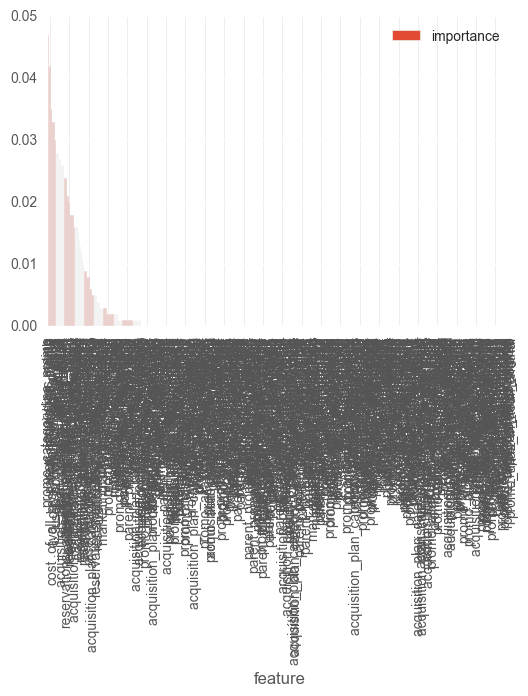

In [89]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(etc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print importances
importances.plot.bar()

In [8]:
df2 = df[['is_converted','is_organic','promo_days','user_acquisition_month','cost_of_all_reservations_in_usd_no_tax','avg_class_rating','avg_peak_classes','lead_created_month','user_acquisition_day_of_week','avg_days_from_booking_to_class','reservations_attended_count']]

In [9]:
X = df2.drop('is_converted', axis=1)
y = df2['is_converted'].astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [165]:
dtc = DecisionTreeClassifier( max_depth = 5, min_samples_leaf = 10)

dtc.fit(X, y)
build_tree_image(dtc)

format_model_results(dtc, X_train, X_test, y_train, y_test)

,Accuracy,F1 score,F1 score (train),Precision,Recall
DecisionTreeClassifier,0.749518,0.819539,0.819959,0.769923,0.87599


In [166]:
rfc = RandomForestClassifier(n_estimators = 30)
rfc.fit(X_train, y_train)

format_model_results(rfc, X_train, X_test, y_train, y_test)

,Accuracy,F1 score,F1 score (train),Precision,Recall
RandomForestClassifier,0.765161,0.81971,0.986638,0.8172,0.822235


In [ ]:
df3 = df[['is_converted','is_organic','promo_days','cost_of_all_reservations_in_usd_no_tax','avg_class_rating','avg_days_from_booking_to_class']]

X = df3.drop('is_converted', axis=1)
y = df3['is_converted'].astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
df4 = df[['is_converted','is_organic','promo_days','user_acquisition_month','cost_of_all_reservations_in_usd_no_tax','avg_class_rating','reservations_attended_count']]
X = df4.drop('is_converted', axis=1)
y = df4['is_converted'].astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
dtc = DecisionTreeClassifier( max_depth = 5, min_samples_leaf = 10)

dtc.fit(X, y)
build_tree_image(dtc)

format_model_results(dtc, X_train, X_test, y_train, y_test)

NameError: name 'DecisionTreeClassifier' is not defined

In [25]:
rfc = RandomForestClassifier(n_estimators = 30)
rfc.fit(X_train, y_train)

format_model_results(rfc, X_train, X_test, y_train, y_test)

NameError: name 'RandomForestClassifier' is not defined

In [48]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
# transform our training features
X_train_std = stdsc.fit_transform(X_train)
# transform the testing features in the same way
X_test_std = stdsc.transform(X_test)

In [49]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2', C=10)

In [50]:
logreg.fit(X_train_std, y_train)
zip(X, logreg.coef_[0])

[('is_organic', 1.4178515436208747),
 ('promo_days', -0.31265652932124582),
 ('user_acquisition_month', 0.23733232460895329),
 ('cost_of_all_reservations_in_usd_no_tax', 0.12735876698469492),
 ('avg_class_rating', -0.37831589561346668),
 ('reservations_attended_count', 0.61311442632482405)]

In [51]:
# class predictions (not predicted probabilities)
y_pred_class = logreg.predict(X_test_std)

In [52]:
# calculate classification accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.718707353021


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#Run 10-fold Cross Val on regression model

linreg = LinearRegression()
scores = cross_val_score(linreg, X_scaled, y, cv=10, scoring='neg_mean_squared_error')
print np.sqrt(-scores).mean()

0.433289771986


In [55]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(scoring = 'neg_mean_squared_error', cv = 10)
ridge.fit(X_scaled, y)
ridge_scores = cross_val_score(linreg, X_scaled, y, cv=10, scoring='neg_mean_squared_error')
print np.sqrt(-ridge_scores).mean()
print ridge.alpha_ #model finds the best alpha value on its own

0.433289771986
10.0


In [58]:
# 20 cross validation iterations with 30% test / 70% train
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
# transform our training features
X_train_std = stdsc.fit_transform(X_train)
# transform the testing features in the same way
X_test_std = stdsc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform', p=2)

In [57]:
# search for an optimal value of K for KNN
k_range = list(range(1, 11))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_std, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

KeyboardInterrupt: 

In [59]:
knn.fit(X_train_std, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [60]:
pred = knn.predict(X_test)


In [62]:
from sklearn.metrics import accuracy_score

print accuracy_score(y_test, pred)

0.555946012337


In [63]:
# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

KeyboardInterrupt: 

The optimal number of neighbors is 1


ValueError: x and y must have same first dimension

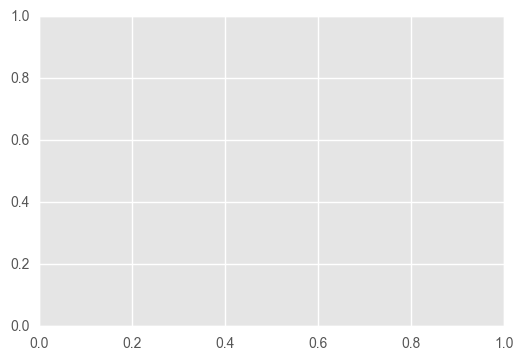

In [64]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()